In [1]:
import pandas as pd 
import numpy as np 
credits=pd.read_csv('credits.csv')
movies=pd.read_csv('movies.csv')
credits
movies

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
5     258000000  [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...   
6     260000000  [{"id": 16, "name": "Animation"}, {"id": 10751...   
7     280000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
8     250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
9     250000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
10    270000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
11    200000000  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
12    200000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
13    255000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
14    225000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
15    225000000  [{"id": 12, "name": "Adventure"}, {"id": 10751...   
16    220000000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
17    380000000  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
18    225000000  [{"id": 28, "name": "Action"}, {"id": 35, "nam...   
19    250000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
20    215000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
21    200000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
22    250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
23    180000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
24    207000000  [{"id": 12, "name": "Adventure"}, {"id": 18, "...   
25    200000000  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...   
26    250000000  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
27    209000000  [{"id": 53, "name": "Thriller"}, {"id": 28, "n...   
28    150000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
29    200000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4773      27000                     [{"id": 35, "name": "Comedy"}]   
4774      27000  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...   
4775          0  [{"id": 18, "name": "Drama"}, {"id": 35, "name...   
4776          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4777          0                      [{"id": 18, "name": "Drama"}]   
4778          0  [{"id": 28, "name": "Action"}, {"id": 18, "nam...   
4779          0                     [{"id": 35, "name": "Comedy"}]   
4780          0  [{"id": 53, "name": "Thriller"}, {"id": 80, "n...   
4781      22000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4782          0  [{"id": 18, "name": "Drama"}, {"id": 10751, "n...   
4783          0  [{"id": 53, "name": "Thriller"}, {"id": 27, "n...   
4784          0  [{"id": 18, "name": "Drama"}, {"id": 35, "name...   
4785          0                      [{"id": 18, "name": "Drama"}]   
4786          0  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4787          0  [{"id": 878, "name": "Science Fiction"}, {"id"...   
4788      12000  [{"id": 27, "name": "Horror"}, {"id": 35, "nam...   
4789          0                      [{"id": 18, "name": "Drama"}]   
4790          0  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   
4791         13                     [{"id": 27, "name": "Horror"}]   
4792      20000  [{"id": 80, "name": "Crime"}, {"id": 27, "name...   
4793          0                      [{"id": 18, "name": "Drama"}]   
4794          0  [{"id": 53, "name": "Thriller"}, {"id": 27, "n...   
4795          0                      [{"id": 18, "name": "Drama"}]   
4796       7000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
4797          0  [{"id": 10769, "name": "Foreign"}, {"id": 53, ...   
4798     220000  [{

In [2]:
#Demographic Filtering
#we need a metric to score or rate movie
#Calculate the score for every movie
#Sort the scores and recommend the best rated movie to the users.
#v is the number of votes for the movie;
#m is the minimum votes required to be listed in the chart;
#R is the average rating of the movie; And
#C is the mean vote across the whole report
C= movies['vote_average'].mean()
C

6.092171559442016

In [3]:
#m is the minimum votes required to be listed in the chart;
m= movies['vote_count'].quantile(0.9)
m

1838.4000000000015

In [4]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [5]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
movies['score'] = movies.apply(weighted_rating, axis=1)

In [6]:
#Sort movies based on score calculated above
movies = movies.sort_values('score', ascending=False)

#Print the top 15 movies
movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

title  vote_count  \
1881                           The Shawshank Redemption        8205   
662                                          Fight Club        9413   
65                                      The Dark Knight       12002   
3232                                       Pulp Fiction        8428   
96                                            Inception       13752   
3337                                      The Godfather        5893   
95                                         Interstellar       10867   
809                                        Forrest Gump        7927   
329       The Lord of the Rings: The Return of the King        8064   
1990                            The Empire Strikes Back        5879   
262   The Lord of the Rings: The Fellowship of the Ring        8705   
2912                                          Star Wars        6624   
1818                                   Schindler's List        4329   
3865                                           Whiplash        4254   
330               The Lord of the Rings: The Two Towers        7487   

      vote_average     score  
1881           8.5  8.059258  
662            8.3  7.939256  
65             8.2  7.920020  
3232           8.3  7.904645  
96             8.1  7.863239  
3337           8.4  7.851236  
95             8.1  7.809479  
809            8.2  7.803188  
329            8.1  7.727243  
1990           8.2  7.697884  
262            8.0  7.667341  
2912           8.1  7.663813  
1818           8.3  7.641883  
3865           8.3  7.633781  
330            8.0  7.623893

Text(0.5, 1.0, 'Popular Movies')

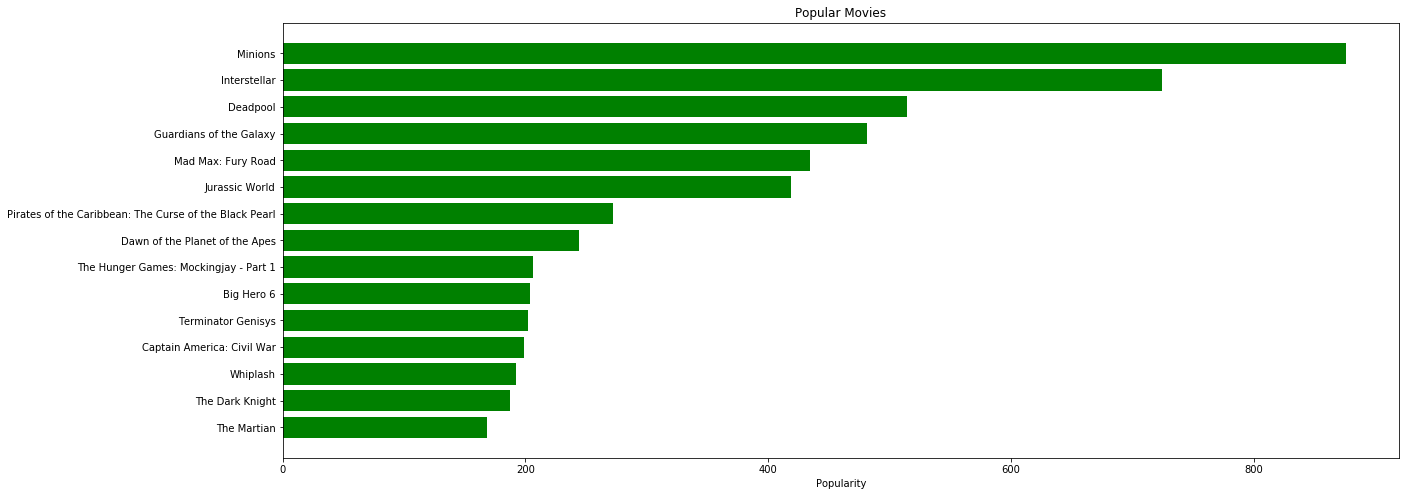

In [8]:
pop= movies.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

plt.barh(pop['title'].head(15),pop['popularity'].head(15), align='center',
        color='green')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")